In [1]:
# First generate some fake data
# I didn't use randomstate so when you run this notebook, it will result different graphics/results
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300,
                  n_features=2,
                  centers=3)

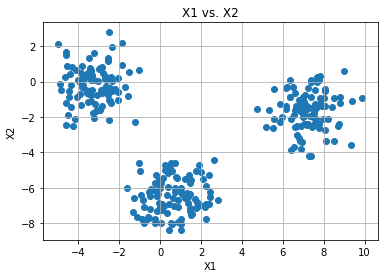

In [2]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.grid()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("X1 vs. X2")
plt.scatter(X[:, 0], X[:, 1])

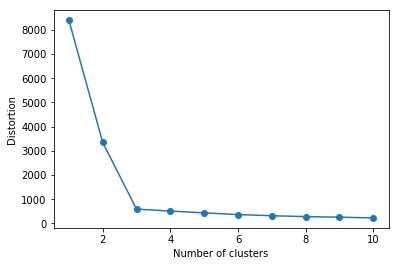

In [3]:
# We will use the elbow method for find optimal number of clusters
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++', # Avoiding random initilization trap
                n_init=10,
                max_iter=300)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

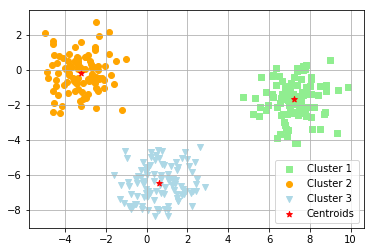

In [4]:
# As we can see in above plot, the elbow is located at k = 3
km = KMeans(n_clusters=3,
                init='k-means++', # Avoiding random initilization trap
                n_init=10,
                max_iter=300)

y_km = km.fit_predict(X)

plt.scatter(X[y_km==0, 0],
            X[y_km==0, 1],
            c='lightgreen',
            marker='s',
            label='Cluster 1')

plt.scatter(X[y_km==1, 0],
            X[y_km==1, 1],
            c='orange',
            marker='o',
            label='Cluster 2')

plt.scatter(X[y_km==2, 0],
            X[y_km==2, 1],
            c='lightblue',
            marker='v',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            c='red',
            marker='*',
            label='Centroids')

plt.legend()
plt.grid()

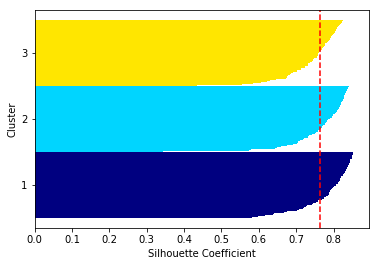

In [5]:
# Qualify the quality of clustering via silhouette plots
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                     y_km,
                                     metric="euclidean")

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor=None,
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')